## Pima Indians - diabetes prediction
## Neural Network for binary classification

In [0]:
# Import necessary libraries
from keras.models import Sequential #The type of ANN
from keras.layers import Dense    #Used to add layers in the ANN
from keras.layers import Dropout #Applies a droupout to avoid overfitting
from keras.constraints import maxnorm
from keras.models import model_from_json
from keras import optimizers #Specify the optimizer going into the ANN
import numpy as np #Packaged used for its usage of 'arrays'
from sklearn.metrics import classification_report, confusion_matrix #Functions to make a confusion matrix and more
from scipy.stats import zscore #Will standardize the input values

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

#Standardize the input Values
X = zscore(X)

# create model (requires completion)
model = Sequential() #Sets up the ANN
# Input layer (with dropout) this is using a 30% dropout rate, it much be a decimal between 0 - 1
model.add(Dropout(0.3,input_shape=(8,))) 
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Teach the model and have fit it to our data, and split data into training and testing
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#The validation split here is 30%. so 70% of data will be used for training and the rest as validation
history=model.fit(X,Y,validation_split=0.3,epochs=1000,verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Used to view all of type 1 and type 2 errors the model have made to properly evaluate it
print('True negatives: ',CM[0,0]) # True negatives
print('False negatives: ',CM[1,0]) #False Negatives
print('False positives: ',CM[0,1]) #True Positives
print('True positives: ',CM[1,1]) #True Positives

768/768 [==============================] - 0s 26us/step

accuracy: 78.91%
Saved model to disk
Confusion Matrix
True negatives:  439
False negatives:  101
False positives:  61
True positives:  167


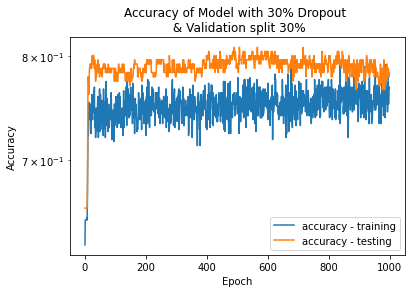

In [0]:
import matplotlib.pyplot as plt #Package used for visuals
accuracy_training = history.history['accuracy']
loss = history.history['loss'] #Saving the loss value
accuracy_testing = history.history['val_accuracy']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training') #Makes a log scale y axis
plt.semilogy(accuracy_testing,label='accuracy - testing') #Makes a log scale y axis
plt.xlabel('Epoch' ) #X label
plt.ylabel('Accuracy') #Y label
plt.title('Accuracy of Model with 30% Dropout \n & Validation split 30%')
plt.legend()
#plt.grid()
plt.savefig('30% acc')
plt.show()

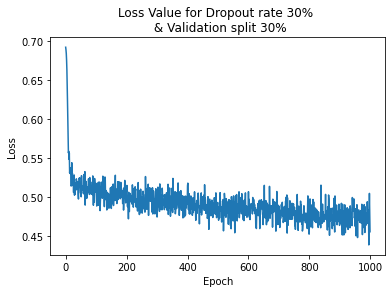

In [0]:
plt.plot(loss #Plot the loss value saved earlier
plt.xlabel('Epoch' ) #X label
plt.ylabel('Loss') #Y label
plt.title('Loss Value for Dropout rate 10%')
plt.savefig('10% loss') #Save image
#plt.grid()
plt.show() #Display image